SHAP Implementation

In [1]:
# %pip install shap

In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix

import shap
shap.initjs()

import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras

In [3]:
# Load the model
model = tf.keras.models.load_model("model_smote")

In [4]:
# Load the data
save_dir = 'smoteData'

# Load train data
train_data_smote = pd.read_csv(os.path.join(save_dir, 'train_data_smote1.csv'))
X_train_smote = train_data_smote.iloc[:, :-1]
y_train_smote = train_data_smote.iloc[:, -1]

# Load test data
test_data_scaled = pd.read_csv(os.path.join(save_dir, 'test_data_scaled1.csv'))
X_test_scaled = test_data_scaled.iloc[:, :-1]
y_test = test_data_scaled.iloc[:, -1]

In [5]:
X_train_smote

,Source,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,-0.079715,-0.138221,-0.140275,-0.614990,0.018034,-0.070574,1.737522,-0.940655,-1.199835,1.524760,...,-0.006054,5.314486,-0.178477,-0.03011,1.812139,0.0,-0.596470,-0.525142,-0.452507,-0.392956
1,-0.079715,-1.291423,-1.290584,-0.358134,-1.140645,-0.070574,-0.953573,-0.985101,-0.033502,-1.011588,...,-0.006054,-0.188165,-0.178477,-0.03011,-0.551834,0.0,1.676529,-0.525142,-0.452507,-0.392956
2,-0.079715,-0.762475,-0.759085,-0.397703,-1.158010,-0.070574,-0.343292,0.118313,-0.033502,-1.011588,...,-0.006054,-0.188165,-0.178477,-0.03011,-0.551834,0.0,-0.596470,-0.525142,-0.452507,-0.392956
3,-0.079715,-0.764429,-0.760870,0.396935,-1.391271,-0.070574,-0.270271,1.112545,1.009246,-1.011588,...,-0.006054,-0.188165,-0.178477,-0.03011,-0.551834,0.0,-0.596470,-0.525142,-0.452507,-0.392956
4,-0.079715,1.361223,1.363504,0.918909,1.193692,-0.070574,1.362808,0.887418,0.314081,1.178894,...,-0.006054,-0.188165,-0.178477,-0.03011,-0.551834,0.0,-0.596470,-0.525142,-0.452507,-0.392956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481627,-0.079715,0.459313,0.456868,-0.344989,-1.164383,-0.057885,-1.268663,1.133527,0.598076,-1.011588,...,-0.006054,-0.188165,-0.178477,-0.03011,-0.551834,0.0,1.676529,1.904248,2.209911,2.544811
481628,-0.079715,0.758208,0.755147,0.845154,1.036666,-0.056249,1.378145,-1.018517,0.126326,0.276047,...,-0.006054,-0.188165,-0.178477,-0.03011,-0.551834,0.0,-0.596470,-0.525142,-0.452507,-0.392956
481629,-0.079715,-0.917048,-0.913348,-2.077236,0.937284,-0.070574,-0.339527,0.266591,0.227654,-0.550434,...,-0.006054,-0.188165,-0.178477,-0.03011,-0.551834,0.0,-0.596470,-0.525142,-0.452507,-0.392956
481630,-0.079715,0.380901,0.376447,-2.001345,0.940864,-0.056249,-1.057664,0.123081,0.395630,-0.550434,...,-0.006054,-0.188165,-0.178477,-0.03011,-0.551834,0.0,-0.596470,-0.525142,-0.452507,-0.392956


In [6]:
y_train_smote

0         1
1         1
2         2
3         1
4         1
         ..
481627    3
481628    3
481629    3
481630    3
481631    3
Name: Severity, Length: 481632, dtype: int64

In [7]:
X_test_scaled

,Source,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,-0.079715,-0.370836,-0.367523,0.878424,1.152033,-0.070574,-0.219168,-0.026619,-0.180259,1.178894,...,-0.006054,-0.188165,-0.178477,-0.03011,1.812139,0.0,-0.596470,-0.525142,-0.452507,-0.392956
1,-0.079715,-1.423899,-1.424437,-0.420522,-1.154975,-0.056249,0.223273,0.084496,-0.033502,-1.011588,...,-0.006054,-0.188165,-0.178477,-0.03011,-0.551834,0.0,1.676529,1.904248,-0.452507,-0.392956
2,-0.079715,-1.342021,-1.342153,1.120975,0.067067,-0.070574,0.874190,0.651662,-1.076250,0.602452,...,-0.006054,-0.188165,-0.178477,-0.03011,-0.551834,0.0,-0.596470,-0.525142,-0.452507,-0.392956
3,-0.079715,-0.750559,-0.746963,1.103409,0.069197,-0.070574,-0.411019,-1.459511,1.094211,0.602452,...,-0.006054,-0.188165,-0.178477,-0.03011,-0.551834,0.0,-0.596470,-0.525142,-0.452507,-0.392956
4,-0.079715,-0.994340,-0.991078,-2.031123,0.939549,-0.070574,-0.312631,-0.256577,-1.671003,-0.550434,...,-0.006054,-0.188165,-0.178477,-0.03011,-0.551834,0.0,-0.596470,-0.525142,-0.452507,-0.392956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47743,-0.079715,0.042488,0.042320,1.199363,0.523194,-0.070574,-0.326176,0.180151,-1.253903,-0.204568,...,-0.006054,-0.188165,-0.178477,-0.03011,-0.551834,0.0,-0.596470,-0.525142,-0.452507,-0.392956
47744,-0.079715,-0.128362,-0.130280,1.268878,0.499347,-0.070574,1.830739,-1.214093,-1.068526,-0.204568,...,-0.006054,-0.188165,-0.178477,-0.03011,-0.551834,0.0,-0.596470,-0.525142,-0.452507,-0.392956
47745,-0.079715,1.710637,1.713568,0.862887,1.130594,-0.070574,1.773110,1.835271,1.758480,1.178894,...,-0.006054,-0.188165,-0.178477,-0.03011,-0.551834,0.0,-0.596470,-0.525142,-0.452507,-0.392956
47746,-0.079715,1.301251,1.303204,0.489351,-1.358068,-0.056249,1.246687,0.983073,1.210072,-1.011588,...,-0.006054,-0.188165,5.602974,-0.03011,-0.551834,0.0,-0.596470,-0.525142,-0.452507,-0.392956


In [8]:
y_test

0        1
1        2
2        2
3        1
4        2
        ..
47743    2
47744    1
47745    1
47746    1
47747    2
Name: Severity, Length: 47748, dtype: int64

In [9]:
model.fit(X_train_smote, y_train_smote)

15051/15051 [==============================] - 80s 5ms/step - loss: 0.2259 - accuracy: 0.8996


In [10]:
explainer = shap.Explainer(model.predict, X_test_scaled)

In [11]:
X_test_sample = X_test_scaled[:100]
shap_values = explainer(X_test_sample)

130/130 [==============================] - 0s 3ms/step


PermutationExplainer explainer:   1%|▌                                                         | 1/100 [00:00<?, ?it/s]

88/88 [==============================] - 1s 6ms/step


PermutationExplainer explainer:   3%|█▌                                                | 3/100 [00:27<05:10,  3.21s/it]

82/82 [==============================] - 0s 3ms/step


PermutationExplainer explainer:   4%|██                                                | 4/100 [00:34<07:38,  4.78s/it]

87/87 [==============================] - 0s 3ms/step


PermutationExplainer explainer:   5%|██▌                                               | 5/100 [00:41<08:37,  5.44s/it]

84/84 [==============================] - 0s 3ms/step


PermutationExplainer explainer:   6%|███                                               | 6/100 [00:47<09:05,  5.80s/it]

83/83 [==============================] - 0s 3ms/step


PermutationExplainer explainer:   7%|███▌                                              | 7/100 [00:54<09:21,  6.03s/it]

87/87 [==============================] - 0s 3ms/step


PermutationExplainer explainer:   8%|████                                              | 8/100 [00:59<09:12,  6.01s/it]

84/84 [==============================] - 0s 3ms/step


PermutationExplainer explainer:   9%|████▌                                             | 9/100 [01:05<09:05,  6.00s/it]

86/86 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  10%|████▉                                            | 10/100 [01:12<09:15,  6.17s/it]

97/97 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  11%|█████▍                                           | 11/100 [01:19<09:19,  6.29s/it]

81/81 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  12%|█████▉                                           | 12/100 [01:25<09:09,  6.25s/it]

90/90 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  13%|██████▎                                          | 13/100 [01:31<09:10,  6.33s/it]

84/84 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  14%|██████▊                                          | 14/100 [01:37<08:53,  6.21s/it]

93/93 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  15%|███████▎                                         | 15/100 [01:43<08:44,  6.17s/it]

84/84 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  16%|███████▊                                         | 16/100 [01:49<08:39,  6.19s/it]

94/94 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  17%|████████▎                                        | 17/100 [01:56<08:40,  6.27s/it]

82/82 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  18%|████████▊                                        | 18/100 [02:02<08:26,  6.17s/it]

84/84 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  19%|█████████▎                                       | 19/100 [02:08<08:20,  6.17s/it]

86/86 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  20%|█████████▊                                       | 20/100 [02:14<08:12,  6.16s/it]

88/88 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  21%|██████████▎                                      | 21/100 [02:20<08:09,  6.20s/it]

86/86 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  22%|██████████▊                                      | 22/100 [02:26<07:53,  6.08s/it]

91/91 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  23%|███████████▎                                     | 23/100 [02:32<07:50,  6.10s/it]

87/87 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  24%|███████████▊                                     | 24/100 [02:39<07:48,  6.16s/it]

87/87 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  25%|████████████▎                                    | 25/100 [02:45<07:50,  6.27s/it]

89/89 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  26%|████████████▋                                    | 26/100 [02:52<07:49,  6.34s/it]

89/89 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  27%|█████████████▏                                   | 27/100 [02:58<07:36,  6.25s/it]

82/82 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  28%|█████████████▋                                   | 28/100 [03:04<07:24,  6.17s/it]

86/86 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  29%|██████████████▏                                  | 29/100 [03:10<07:24,  6.26s/it]

91/91 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  30%|██████████████▋                                  | 30/100 [03:17<07:21,  6.30s/it]

84/84 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  31%|███████████████▏                                 | 31/100 [03:22<07:04,  6.16s/it]

88/88 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  32%|███████████████▋                                 | 32/100 [03:28<06:51,  6.06s/it]

83/83 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  33%|████████████████▏                                | 33/100 [03:34<06:48,  6.10s/it]

83/83 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  34%|████████████████▋                                | 34/100 [03:40<06:40,  6.07s/it]

91/91 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  35%|█████████████████▏                               | 35/100 [03:47<06:41,  6.17s/it]

84/84 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  36%|█████████████████▋                               | 36/100 [03:55<07:07,  6.68s/it]

92/92 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  37%|██████████████████▏                              | 37/100 [04:03<07:23,  7.04s/it]

94/94 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  38%|██████████████████▌                              | 38/100 [04:09<07:03,  6.83s/it]

89/89 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  39%|███████████████████                              | 39/100 [04:15<06:47,  6.68s/it]

94/94 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  40%|███████████████████▌                             | 40/100 [04:22<06:35,  6.58s/it]

87/87 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  41%|████████████████████                             | 41/100 [04:28<06:18,  6.41s/it]

92/92 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  42%|████████████████████▌                            | 42/100 [04:34<06:14,  6.46s/it]

90/90 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  43%|█████████████████████                            | 43/100 [04:40<06:02,  6.36s/it]

90/90 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  44%|█████████████████████▌                           | 44/100 [04:47<05:58,  6.41s/it]

85/85 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  45%|██████████████████████                           | 45/100 [04:53<05:50,  6.38s/it]

82/82 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  46%|██████████████████████▌                          | 46/100 [04:59<05:37,  6.25s/it]

84/84 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  47%|███████████████████████                          | 47/100 [05:05<05:20,  6.04s/it]

84/84 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  48%|███████████████████████▌                         | 48/100 [05:11<05:17,  6.10s/it]

88/88 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  49%|████████████████████████                         | 49/100 [05:17<05:10,  6.08s/it]

86/86 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  50%|████████████████████████▌                        | 50/100 [05:23<05:04,  6.10s/it]

96/96 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  51%|████████████████████████▉                        | 51/100 [05:29<04:55,  6.04s/it]

84/84 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  52%|█████████████████████████▍                       | 52/100 [05:35<04:50,  6.06s/it]

90/90 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  53%|█████████████████████████▉                       | 53/100 [05:41<04:47,  6.11s/it]

88/88 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  54%|██████████████████████████▍                      | 54/100 [05:47<04:40,  6.09s/it]

81/81 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  55%|██████████████████████████▉                      | 55/100 [05:53<04:30,  6.00s/it]

91/91 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  56%|███████████████████████████▍                     | 56/100 [05:59<04:25,  6.02s/it]

83/83 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  57%|███████████████████████████▉                     | 57/100 [06:05<04:17,  6.00s/it]

83/83 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  58%|████████████████████████████▍                    | 58/100 [06:11<04:12,  6.02s/it]

88/88 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  59%|████████████████████████████▉                    | 59/100 [06:17<04:07,  6.05s/it]

86/86 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  60%|█████████████████████████████▍                   | 60/100 [06:24<04:02,  6.07s/it]

94/94 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  61%|█████████████████████████████▉                   | 61/100 [06:30<04:01,  6.20s/it]

89/89 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  62%|██████████████████████████████▍                  | 62/100 [06:36<03:56,  6.21s/it]

86/86 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  63%|██████████████████████████████▊                  | 63/100 [06:44<04:10,  6.76s/it]

93/93 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  64%|███████████████████████████████▎                 | 64/100 [06:50<03:56,  6.58s/it]

86/86 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  65%|███████████████████████████████▊                 | 65/100 [06:56<03:41,  6.34s/it]

89/89 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  66%|████████████████████████████████▎                | 66/100 [07:02<03:32,  6.24s/it]

85/85 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  67%|████████████████████████████████▊                | 67/100 [07:08<03:21,  6.11s/it]

84/84 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  68%|█████████████████████████████████▎               | 68/100 [07:15<03:19,  6.22s/it]

91/91 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  69%|█████████████████████████████████▊               | 69/100 [07:21<03:13,  6.26s/it]

89/89 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  70%|██████████████████████████████████▎              | 70/100 [07:27<03:06,  6.23s/it]

83/83 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  71%|██████████████████████████████████▊              | 71/100 [07:33<03:00,  6.22s/it]

85/85 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  72%|███████████████████████████████████▎             | 72/100 [07:39<02:53,  6.21s/it]

85/85 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  73%|███████████████████████████████████▊             | 73/100 [07:46<02:48,  6.26s/it]

85/85 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  74%|████████████████████████████████████▎            | 74/100 [07:52<02:43,  6.27s/it]

86/86 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  75%|████████████████████████████████████▊            | 75/100 [07:59<02:42,  6.49s/it]

89/89 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  76%|█████████████████████████████████████▏           | 76/100 [08:06<02:35,  6.48s/it]

93/93 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  77%|█████████████████████████████████████▋           | 77/100 [08:13<02:38,  6.89s/it]

86/86 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  78%|██████████████████████████████████████▏          | 78/100 [08:20<02:27,  6.69s/it]

85/85 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  79%|██████████████████████████████████████▋          | 79/100 [08:26<02:18,  6.60s/it]

94/94 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  80%|███████████████████████████████████████▏         | 80/100 [08:33<02:16,  6.83s/it]

87/87 [==============================] - 1s 16ms/step


PermutationExplainer explainer:  81%|███████████████████████████████████████▋         | 81/100 [08:46<02:44,  8.68s/it]

91/91 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  82%|████████████████████████████████████████▏        | 82/100 [08:56<02:39,  8.87s/it]

85/85 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  83%|████████████████████████████████████████▋        | 83/100 [09:02<02:17,  8.12s/it]

94/94 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  84%|█████████████████████████████████████████▏       | 84/100 [09:09<02:02,  7.66s/it]

80/80 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  85%|█████████████████████████████████████████▋       | 85/100 [09:15<01:49,  7.33s/it]

95/95 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  86%|██████████████████████████████████████████▏      | 86/100 [09:22<01:42,  7.32s/it]

89/89 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  87%|██████████████████████████████████████████▋      | 87/100 [09:29<01:32,  7.10s/it]

91/91 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  88%|███████████████████████████████████████████      | 88/100 [09:35<01:21,  6.79s/it]

92/92 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  89%|███████████████████████████████████████████▌     | 89/100 [09:42<01:13,  6.69s/it]

88/88 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  90%|████████████████████████████████████████████     | 90/100 [09:48<01:05,  6.53s/it]

86/86 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  91%|████████████████████████████████████████████▌    | 91/100 [09:54<00:57,  6.38s/it]

90/90 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  92%|█████████████████████████████████████████████    | 92/100 [10:00<00:49,  6.23s/it]

87/87 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  93%|█████████████████████████████████████████████▌   | 93/100 [10:06<00:43,  6.22s/it]

91/91 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  94%|██████████████████████████████████████████████   | 94/100 [10:12<00:37,  6.25s/it]

85/85 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  95%|██████████████████████████████████████████████▌  | 95/100 [10:18<00:30,  6.17s/it]

89/89 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  96%|███████████████████████████████████████████████  | 96/100 [10:25<00:25,  6.28s/it]

93/93 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  97%|███████████████████████████████████████████████▌ | 97/100 [10:31<00:19,  6.35s/it]

88/88 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  98%|████████████████████████████████████████████████ | 98/100 [10:37<00:12,  6.26s/it]

84/84 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  99%|████████████████████████████████████████████████▌| 99/100 [10:43<00:06,  6.14s/it]

95/95 [==============================] - 0s 3ms/step


PermutationExplainer explainer: 100%|████████████████████████████████████████████████| 100/100 [10:49<00:00,  6.13s/it]

87/87 [==============================] - 0s 4ms/step


PermutationExplainer explainer: 101it [10:56,  6.56s/it]                                                               


In [83]:
from collections import Counter

Y_test_sample = y_test[:100]
unique_values_count = Counter(Y_test_sample)

print(Y_test_sample.unique())

# Print the result
for value, count in unique_values_count.items():
    print(f"Class {value}: {count} instances")

[1 2]
Class 1: 58 instances
Class 2: 42 instances


In [48]:
print(shap_values)

.values =
array([[[ 3.46276562e-07,  1.89983057e-04, -1.90326108e-04,
         -3.08785759e-09],
        [ 6.36319235e-04,  6.69879140e-03, -7.14315628e-03,
         -1.91956585e-04],
        [ 1.99140559e-04, -2.24574001e-02,  2.06889052e-02,
          1.56934654e-03],
        ...,
        [ 1.27468431e-03, -3.18650533e-03,  1.91332370e-03,
         -1.50362206e-06],
        [ 1.90782713e-05, -3.46256151e-04,  1.09753212e-03,
         -7.70355317e-04],
        [ 3.04863499e-04,  8.45639201e-03, -8.43100483e-03,
         -3.30250850e-04]],

       [[ 8.45122892e-09, -4.96760708e-04, -2.25492473e-04,
          7.22244696e-04],
        [-8.02508088e-03,  2.69833903e-02, -1.73350685e-02,
         -1.62323878e-03],
        [-1.21037277e-03,  3.74352124e-03,  3.27236791e-03,
         -5.80551622e-03],
        ...,
        [ 5.37599388e-04, -4.84105380e-03,  2.11442177e-03,
          2.18903573e-03],
        [-2.02911249e-04, -1.09873639e-03,  1.89119376e-03,
         -5.89545979e-04],
     

In [55]:
shap_values_path = 'shapData/shap_values.npz'

np.savez(shap_values_path, values=shap_values.values, base_values=shap_values.base_values, data=shap_values.data)

In [68]:
loaded_data = np.load(shap_values_path)

# Get the data type dynamically
values_dtype = loaded_data['values'].dtype
base_values_dtype = loaded_data['base_values'].dtype
data_dtype = loaded_data['data'].dtype

# Reconstruct shap_values with the same dtype
shap_values = shap.Explanation(
    values=loaded_data['values'].astype(values_dtype),
    base_values=loaded_data['base_values'].astype(base_values_dtype),
    data=loaded_data['data'].astype(data_dtype)
)

shap_values

.values =
array([[[ 3.46276562e-07,  1.89983057e-04, -1.90326108e-04,
         -3.08785759e-09],
        [ 6.36319235e-04,  6.69879140e-03, -7.14315628e-03,
         -1.91956585e-04],
        [ 1.99140559e-04, -2.24574001e-02,  2.06889052e-02,
          1.56934654e-03],
        ...,
        [ 1.27468431e-03, -3.18650533e-03,  1.91332370e-03,
         -1.50362206e-06],
        [ 1.90782713e-05, -3.46256151e-04,  1.09753212e-03,
         -7.70355317e-04],
        [ 3.04863499e-04,  8.45639201e-03, -8.43100483e-03,
         -3.30250850e-04]],

       [[ 8.45122892e-09, -4.96760708e-04, -2.25492473e-04,
          7.22244696e-04],
        [-8.02508088e-03,  2.69833903e-02, -1.73350685e-02,
         -1.62323878e-03],
        [-1.21037277e-03,  3.74352124e-03,  3.27236791e-03,
         -5.80551622e-03],
        ...,
        [ 5.37599388e-04, -4.84105380e-03,  2.11442177e-03,
          2.18903573e-03],
        [-2.02911249e-04, -1.09873639e-03,  1.89119376e-03,
         -5.89545979e-04],
     

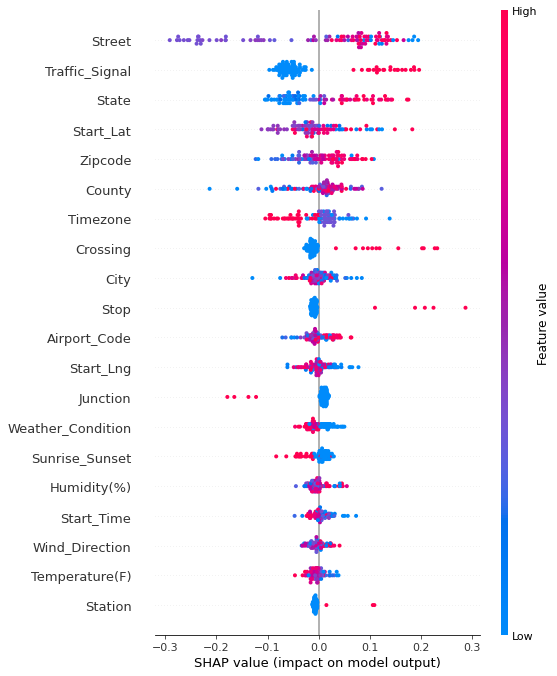

In [88]:
# Use shap.summary_plot with the extracted values
shap.summary_plot(shap_values[:, :, 1], feature_names=X_test_sample.columns, show=False)

plt.savefig('summary_plot.png', dpi=300)
plt.show()

In [89]:
# Force plot for the first observation and the first class
shap.plots.force(shap_values[0, :, 1], feature_names=X_test_sample.columns, show=False)

# plt.savefig('force_plot.png',bbox_inches='tight', dpi=300)
# plt.show()

In [91]:
# Force plot for the all observation and the first class
shap.plots.force(shap_values[:, :, 1],feature_names=X_test_sample.columns, show=False)

# plt.savefig('force_plot_all.png',bbox_inches='tight', dpi=300)
# plt.show()

In [94]:
idx = 0
exp = shap.Explanation(shap_values.values[:, :, 1],
                      shap_values.base_values[:, 1],
                      data=X_test_sample.values,
                      feature_names=X_test_sample.columns)

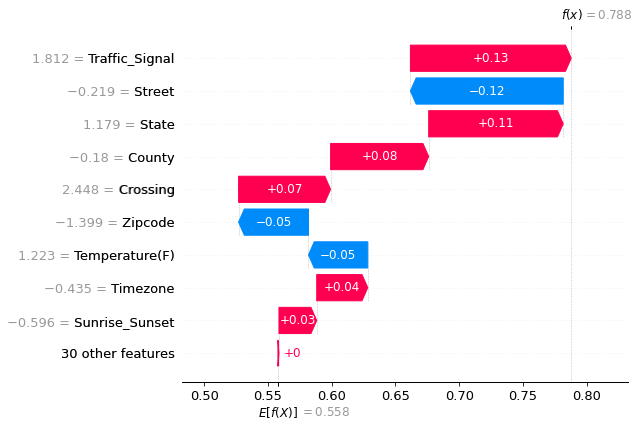

In [95]:
# Waterfall plot for the first observation, first feature, and first class
shap.plots.waterfall(exp[idx], show=False)

plt.savefig('waterfall_plot.png',bbox_inches='tight', dpi=300)
plt.show()

__SHAP dependence plot__

In [28]:
feature_columns = X_test_sample.columns

# Print feature index for each feature
for feature_index, feature_name in enumerate(feature_columns):
    print(f"{feature_name} : {feature_index}")

Source : 0
Start_Time : 1
End_Time : 2
Start_Lat : 3
Start_Lng : 4
Distance(mi) : 5
Street : 6
City : 7
County : 8
State : 9
Zipcode : 10
Country : 11
Timezone : 12
Airport_Code : 13
Weather_Timestamp : 14
Temperature(F) : 15
Humidity(%) : 16
Pressure(in) : 17
Visibility(mi) : 18
Wind_Direction : 19
Wind_Speed(mph) : 20
Weather_Condition : 21
Amenity : 22
Bump : 23
Crossing : 24
Give_Way : 25
Junction : 26
No_Exit : 27
Railway : 28
Roundabout : 29
Station : 30
Stop : 31
Traffic_Calming : 32
Traffic_Signal : 33
Turning_Loop : 34
Sunrise_Sunset : 35
Civil_Twilight : 36
Nautical_Twilight : 37
Astronomical_Twilight : 38


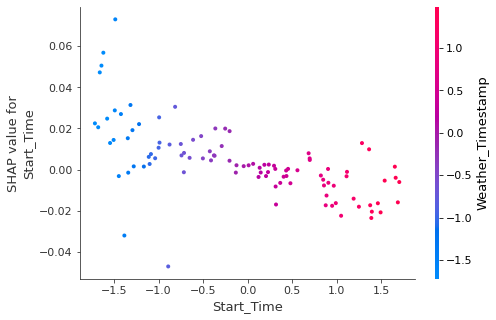

In [96]:
feature_index = 1  # Replace with the index of the feature you are interested in

# Create a SHAP dependence plot
shap.dependence_plot(
    feature_index,
    shap_values.values[:, :, 1],  # Assuming you want to plot the SHAP values for the first class
    X_test_sample,
    feature_names=X_test_sample.columns,
    interaction_index=14,  # Set to "auto" to automatically choose the interaction feature
    show=False  # Set to True if you want to display the plot using matplotlib
)

plt.savefig('dependency_plot.png', bbox_inches='tight', dpi=300)
plt.show()

__SHAP Interaction Values__

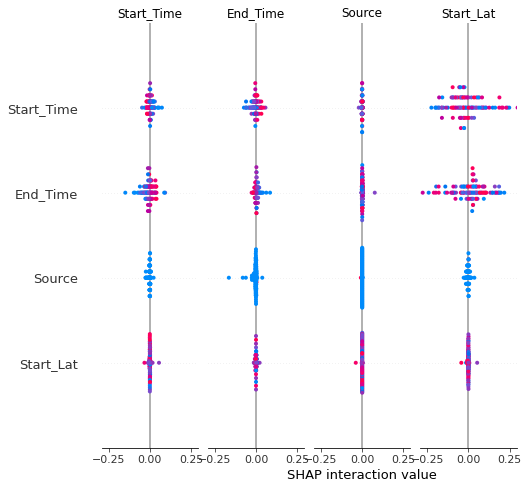

In [30]:
shap.summary_plot(shap_values[:, :, :], X_test_sample.values, feature_names=X_test_sample.columns, show=False)

plt.savefig('summary_plot_all.png', bbox_inches='tight', dpi=300)
plt.show()